# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../code/Homework/06-Python-APIs/Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

count_number = 0
set_number = 1

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if count_number > 48:
            count_number = 1
            set_number += 1
            city_list.append(city)
        else:
            count_number += 1
            city_list.append(city)
        print(f"Processing Record {count_number} of Set {set_number} | {city}")
    except (KeyError, IndexError):
        print("CITY NOT FOUND. SKIPPING...")      

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | anar darreh
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | ginir
Processing Record 6 of Set 1 | barghat
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | ixtapa
Processing Record 10 of Set 1 | ordynskoye
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | khani
Processing Record 13 of Set 1 | caravelas
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | ponta do sol
CITY NOT FOUND. SKIPPING...
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | hay river
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | gubkinskiy
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | shirokiy
Processing Record 23 of Set 1 | mahebourg
Processing Record 24 of Set 1 | ushuaia
Proces

CITY NOT FOUND. SKIPPING...
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | ambunti
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | kinsale
Processing Record 47 of Set 4 | bonthe
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | khatanga
Processing Record 1 of Set 5 | gurupi
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | kavaratti
Processing Record 4 of Set 5 | mehamn
Processing Record 5 of Set 5 | tanete
Processing Record 6 of Set 5 | tommot
Processing Record 7 of Set 5 | jiaozuo
CITY NOT FOUND. SKIPPING...
Processing Record 8 of Set 5 | san bernardo
Processing Record 9 of Set 5 | victoria
Processing Record 10 of Set 5 | thompson
Processing Record 11 of Set 5 | san patricio
Processing Record 12 of Set 5 | clyde river
Processing Record 13 of Set 5 | dingle
Processing Record 14 of Set 5 | mayumba
Processing Record 15 of Set 5 | vagur
Processing

Processing Record 30 of Set 8 | talaya
Processing Record 31 of Set 8 | borovoy
Processing Record 32 of Set 8 | hongjiang
Processing Record 33 of Set 8 | kollam
CITY NOT FOUND. SKIPPING...
Processing Record 34 of Set 8 | broome
Processing Record 35 of Set 8 | orotukan
Processing Record 36 of Set 8 | verkhnyaya toyma
Processing Record 37 of Set 8 | siocon
Processing Record 38 of Set 8 | saint-raymond
Processing Record 39 of Set 8 | yuncheng
Processing Record 40 of Set 8 | sorong
CITY NOT FOUND. SKIPPING...
Processing Record 41 of Set 8 | maningrida
Processing Record 42 of Set 8 | pelym
Processing Record 43 of Set 8 | clearwater
Processing Record 44 of Set 8 | sisimiut
Processing Record 45 of Set 8 | mnogovershinnyy
Processing Record 46 of Set 8 | komsomolskiy
Processing Record 47 of Set 8 | del rio
Processing Record 48 of Set 8 | kaeo
Processing Record 49 of Set 8 | pacific grove
Processing Record 1 of Set 9 | koumac
Processing Record 2 of Set 9 | atar
Processing Record 3 of Set 9 | razo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,100,NZ,1618277964,95,-46.1927,168.8643,55.00,3.00
1,albany,100,US,1618277821,75,42.6001,-73.9662,50.00,4.52
2,anar darreh,0,FI,1618277983,93,68.9060,27.0288,17.60,1.14
3,jamestown,90,US,1618277856,81,42.0970,-79.2353,50.00,6.91
4,ginir,100,ET,1618277983,71,7.1333,40.7000,58.46,5.61
5,barghat,0,IN,1618277984,14,22.0333,79.7167,84.09,2.86
6,fortuna,1,US,1618277984,71,40.5982,-124.1573,55.99,13.80
7,labuhan,8,ID,1618277985,75,-6.8844,112.2051,82.80,4.29
8,ixtapa,1,MX,1618277892,73,20.7000,-105.2000,77.00,9.22
9,ordynskoye,100,RU,1618277985,99,54.3656,81.8994,34.72,6.51


In [5]:
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

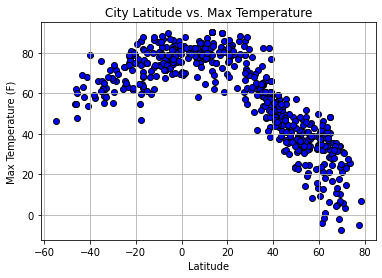

In [21]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "blue", edgecolor = "black")

plt.grid()

plt.title("City Latitude vs. Max Temperature")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature (F)")

plt.show()

## Latitude vs. Humidity Plot

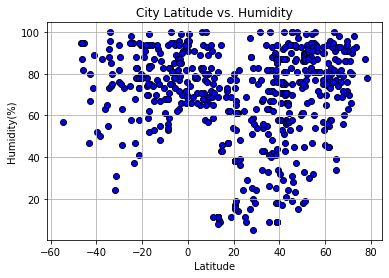

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", color = "blue", edgecolor = "black")

plt.grid()

plt.title("City Latitude vs. Humidity")

plt.xlabel("Latitude")

plt.ylabel("Humidity(%)")

plt.show()

## Latitude vs. Cloudiness Plot

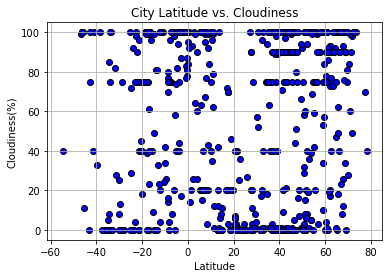

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", color = "blue", edgecolor = "black")

plt.grid()

plt.title("City Latitude vs. Cloudiness")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness(%)")

plt.show()

## Latitude vs. Wind Speed Plot

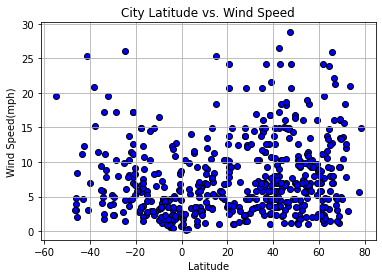

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", color = "blue", edgecolor = "black")

plt.grid()

plt.title("City Latitude vs. Wind Speed")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed(mph)")

plt.show()

## Linear Regression

In [12]:
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

def linear_reg_plot(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.median(),y.median()),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.89
None


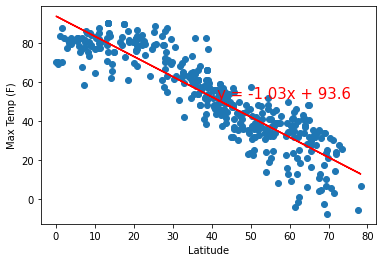

In [13]:
x_values = northern_hemisphere["Lat"]

y_values = northern_hemisphere["Max Temp"]

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.65
None


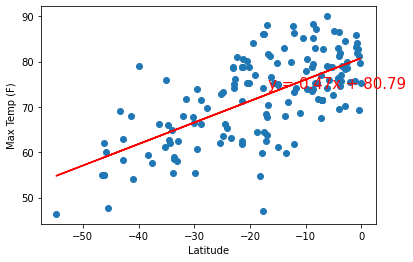

In [14]:
x_values = southern_hemisphere["Lat"]

y_values = southern_hemisphere["Max Temp"]

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.25
None


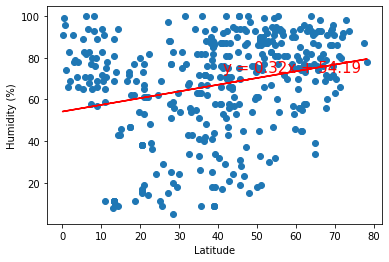

In [15]:
x_values = northern_hemisphere["Lat"]

y_values = northern_hemisphere["Humidity"]

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.1
None


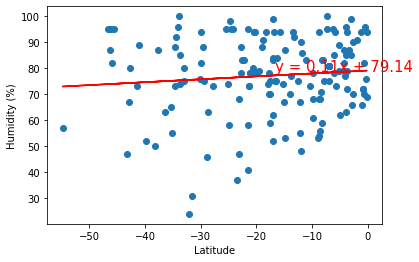

In [16]:
x_values = southern_hemisphere["Lat"]

y_values = southern_hemisphere["Humidity"]

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21
None


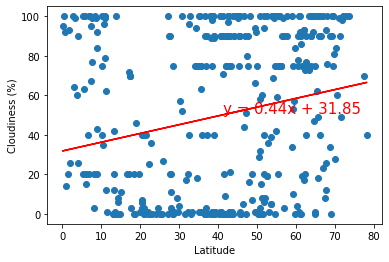

In [17]:
x_values = northern_hemisphere["Lat"]

y_values = northern_hemisphere["Cloudiness"]

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.26
None


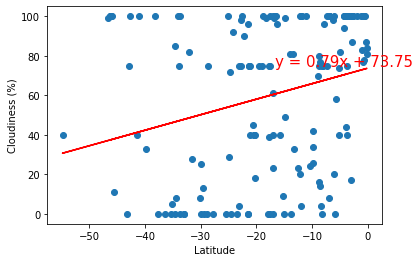

In [18]:
x_values = southern_hemisphere["Lat"]

y_values = southern_hemisphere["Cloudiness"]

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.17
None


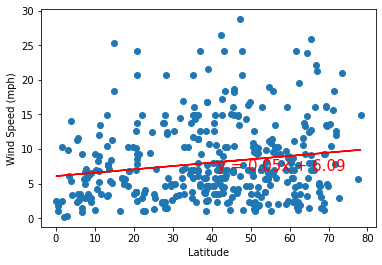

In [19]:
x_values = northern_hemisphere["Lat"]

y_values = northern_hemisphere["Wind Speed"]

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.33
None


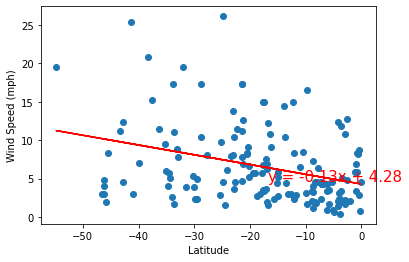

In [20]:
x_values = southern_hemisphere["Lat"]

y_values = southern_hemisphere["Wind Speed"]

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

print(linear_reg_plot(x_values,y_values))